In [3]:

# import

# basic 
import numpy as np
import scipy
import pandas as pd
import math

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# there also is a module on preprocessing in sklearn

##sklearn learners (learners as the different types of models)
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

##sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

Text(0, 0.5, 'mdev')

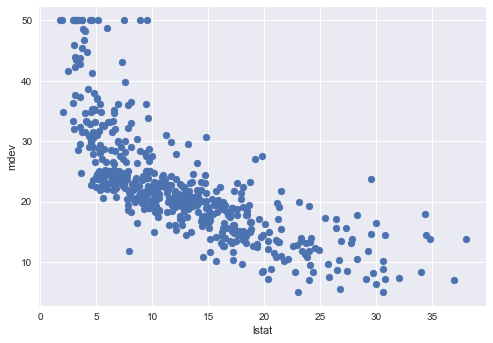

In [4]:
# read in boston data
bd = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/Boston.csv")

#pull off y=medv and x = lstat
y = bd['medv']
X = bd['lstat'].to_numpy()[:,np.newaxis]

#plot x vs. y
plt.scatter(X,y)
plt.xlabel('lstat')
plt.ylabel('mdev')

In [5]:
# fit one knn

# create model object setting the hyperparameter n_neighbors to 50
knnmod = KNeighborsRegressor(n_neighbors=50)

# fit with training data
knnmod.fit(X,y)

#predict on sorted x training values
Xtest = np.sort(X[:,0])[:,np.newaxis]
yhat = knnmod.predict(Xtest)

Text(0, 0.5, 'medv')

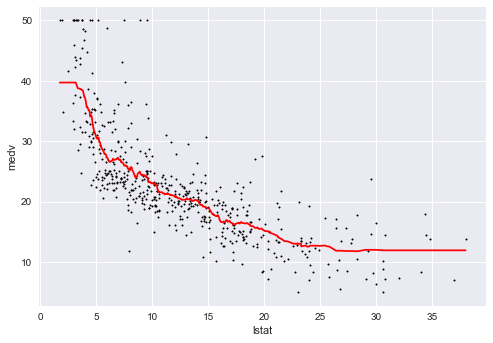

In [6]:
#plot fit
plt.scatter(X,y,s=10,c='k',marker='.')
plt.plot(Xtest,yhat,c='red')
plt.xlabel('lstat')
plt.ylabel('medv')

In [7]:
#  cross validation using sklearn cross_val_score

# to see a list of scorers:
# sorted(sklearn.metrics.SCORERS.keys()) 

#model object
tempmod = KNeighborsRegressor(n_neighbors=40) #knn with k=40

## rmse from cross validation
cvres = cross_val_score(tempmod,X,y,cv=5,scoring='neg_mean_squared_error') #cross val with 5 folds

In [8]:
# train/test split

#train/test split
myseed = 34
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=myseed, test_size=.2)

# model object
kmod = KNeighborsRegressor(n_neighbors=50)

# fit on train
kmod.fit(Xtrain,ytrain)

# predict on test
ypred = kmod.predict(Xtest)

In [9]:
# tranform to rmse
rmse = math.sqrt(np.mean(-cvres)) 
print('the rmse for k=40 based on 5-fold is:', rmse)

the rmse for k=40 based on 5-fold is: 5.538843916375064


In [13]:
#  loop over k using simple train/test split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=myseed, test_size=.2)

kvec = np.arange(348) + 2 #values of k to try
ormsev = np.zeros(len(kvec)) # storage for oos rsmse
irmsev = np.zeros(len(kvec)) # storage for in-sample rsmse

for i in range(len(kvec)):
   tmod = KNeighborsRegressor(n_neighbors=kvec[i])
   tmod.fit(Xtrain,ytrain)
   yhat = tmod.predict(Xtest)
   ormsev[i] = math.sqrt(mean_squared_error(ytest,yhat))
   yhat = tmod.predict(Xtrain)
   irmsev[i] = math.sqrt(mean_squared_error(ytrain,yhat))

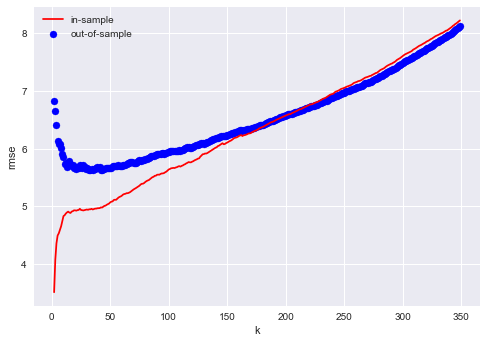

In [14]:
# plot rmse vs k
plt.scatter(kvec,ormsev,c='blue',label='out-of-sample')
plt.plot(kvec,irmsev,c='red',label='in-sample')
plt.xlabel('k'); plt.ylabel('rmse')
plt.legend()

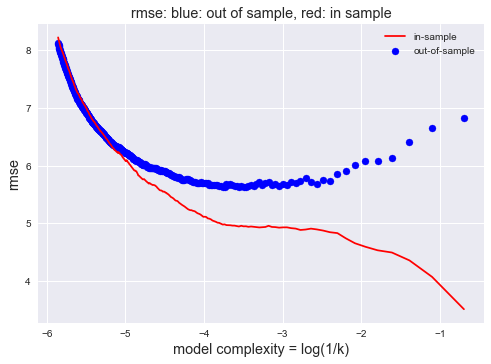

In [15]:
# plot rmse vs model complexity
mcmp = np.log(1/kvec) #model complexity
plt.scatter(mcmp,ormsev,c='blue',label='out-of-sample')
plt.plot(mcmp,irmsev,c='red',label='in-sample')
plt.xlabel('model complexity = log(1/k)',size='x-large')
plt.ylabel('rmse',size='x-large')
plt.title('rmse: blue: out of sample, red: in sample',size='x-large')
plt.legend()

In [17]:

#  cross validation using sklearn cross_val_score

# to see a list of scorers:
# sorted(sklearn.metrics.SCORERS.keys()) 

#model object
tempmod = KNeighborsRegressor(n_neighbors=40) #knn with k=40

## rmse from cross validation
cvres = cross_val_score(tempmod,X,y,cv=5,scoring='neg_mean_squared_error') #cross val with 5 folds

# tranform to rmse
rmse = math.sqrt(np.mean(-cvres)) 
print('the rmse for k=40 based on 5-fold is:', rmse)

## do it again but shuffle the data
np.random.seed(34) 
indices = np.random.choice(X.shape[0],X.shape[0],replace=False)
ys = y[indices]
Xs = X[indices,:]
cvres = cross_val_score(tempmod,Xs,ys,cv=5,scoring='neg_mean_squared_error')
rmse = math.sqrt(np.mean(-cvres))
print('the rmse for k=40 based on 5-fold is:', rmse)

the rmse for k=40 based on 5-fold is: 5.538843916375064
the rmse for k=40 based on 5-fold is: 5.205840621155646


In [19]:

#  cross validation on a grid of k values using sklearn validation_curve function

# create the knn model
model = KNeighborsRegressor() # create the knn model

# do cv at every value of k in kvec
# each row of (trains,test)S will correspond to a value of k
# each column has the cv=10 neg_mean_squared_error in-sample (trainS) and out of sample (testS)
trainS, testS = validation_curve(model,X,y,'n_neighbors',kvec,cv=10,scoring='neg_mean_squared_error')

# transform neg_mean_squared_error to rmse
trrmse = np.sqrt(-trainS.mean(axis=1))
termse = np.sqrt(-testS.mean(axis=1))

/Users/tk/opt/miniconda3/envs/data-science-env/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 2

KeyboardInterrupt: 

In [ ]:
#plot in and out of sample rmse
plt.scatter(mcmp,termse,label='in-sample')
plt.plot(mcmp,trrmse,c='red',label='out-of-sample')
plt.xlabel('model complexity = log(1/k)',size='x-large')
plt.ylabel('rmse',size='x-large')
plt.legend()

In [ ]:
#plot to check predictions
plt.scatter(ytest,ypred)
plt.plot(ypred,ypred,c='red')

In [ ]:
#rmse
k50mse = mean_squared_error(ytest,ypred)

 
#check rmse
check  = np.sum((ypred-ytest)**2)/len(ytest)
print('val from fun:',k50mse,' and check val: ',check)

In [ ]:
# cross val on a grid using sklearn GridSearchCV

# hyperparamter values to try in the gid search
param_grid={'n_neighbors' : kvec} # same as above

# grid  is the grid searh object
grid = GridSearchCV(model,param_grid,cv=10,scoring='neg_mean_squared_error')

# now run the grid search
grid.fit(X,y)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(kvec[grid.best_index_])


temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#transform to rmse (notice the negative sign in order to get positive value)
rmsevals = np.sqrt(-temp['mean_test_score'])

In [ ]:
# plot
plt.plot(mcmp,rmsevals) # plot model complexity vs. rmse
plt.xlabel('model complexity = log(1/k)',size='x-large')
plt.ylabel('rmse',size='x-large')
plt.title('rmse from GridSearch')